<a href="https://colab.research.google.com/github/JPtheOne/GA-TravellingSalesman/blob/main/GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Genetic algorithm to solve Travel Salesman
### Juan Pablo Morales Durante 171657

## Translating the map to computational terms


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

# Creates new graph
G = nx.Graph()

# Adding the cities
G.add_nodes_from(["Amsterdam", "Berlin", "Cologne", "London", "Brussels", "Frankfurt",
                  "Paris", "Lyon", "Milan", "Rome", "Barcelona", "Madrid"])


# Adding the weighted edges
G.add_edge("Amsterdam", "Berlin", time=364, cost=235)
G.add_edge("Amsterdam", "Cologne", time=120, cost=40)
G.add_edge("Amsterdam", "Brussels", time=105, cost=48)

G.add_edge("Berlin", "Amsterdam", time=364, cost=235)
G.add_edge("Berlin", "Frankfurt", time=232, cost=125)

G.add_edge("Cologne", "Amsterdam", time=120, cost=40)
G.add_edge("Cologne", "Frankfurt", time=120, cost=40)

G.add_edge("Frankfurt", "Berlin", time=232, cost=125)
G.add_edge("Frankfurt", "Cologne", time=120, cost=40)
G.add_edge("Frankfurt", "Paris", time=480, cost=345)
G.add_edge("Frankfurt", "Milan", time=454, cost=240)

G.add_edge("Brussels", "Amsterdam", time=105, cost=48)
G.add_edge("Brussels", "Paris", time=82, cost=80)

G.add_edge("London", "Paris", time=136, cost=98)
G.add_edge("London", "Brussels", time=136, cost=98)

G.add_edge("Paris", "London", time=136, cost=98)
G.add_edge("Paris", "Brussels", time=82, cost=80)
G.add_edge("Paris", "Frankfurt", time=480, cost=345)
G.add_edge("Paris", "Lyon", time=112, cost=185)
G.add_edge("Paris", "Barcelona", time=390, cost=400)
G.add_edge("Paris", "Madrid", time=225, cost=380)

G.add_edge("Lyon", "Paris", time=112, cost=185)
G.add_edge("Lyon", "Milan", time=176, cost=180)
G.add_edge("Lyon", "Barcelona", time=200, cost=320)

G.add_edge("Milan", "Frankfurt", time=454, cost=240)
G.add_edge("Milan", "Rome", time=168, cost=125)
G.add_edge("Milan", "Lyon", time=176, cost=180)

G.add_edge("Barcelona", "Paris", time=390, cost=400)
G.add_edge("Barcelona", "Lyon", time=200, cost=320)
G.add_edge("Barcelona", "Madrid", time=150, cost=98)

G.add_edge("Madrid", "Paris", time=225, cost=380)
G.add_edge("Madrid", "Barcelona", time=150, cost=98)

### Plot the graph

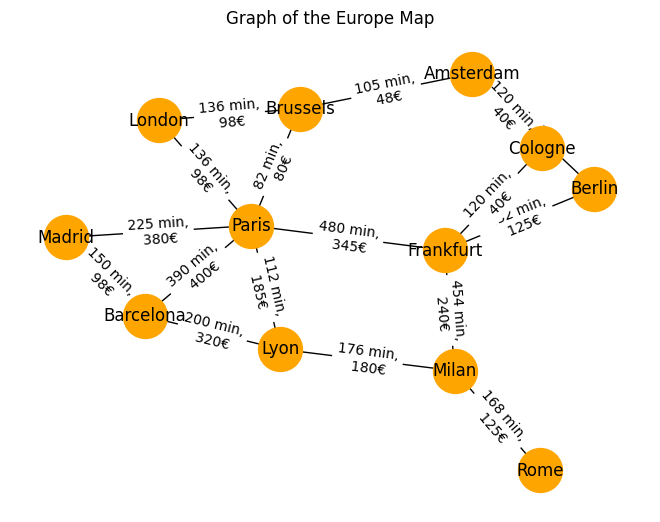

In [2]:

pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_color='orange', node_size=1000)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['time']} min,\n {d['cost']}€" for u, v, d in G.edges(data=True)})
plt.title('Graph of the Europe Map')
plt.show()

### Transform the graph onto a set of points with coordinates on a scatterplot

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


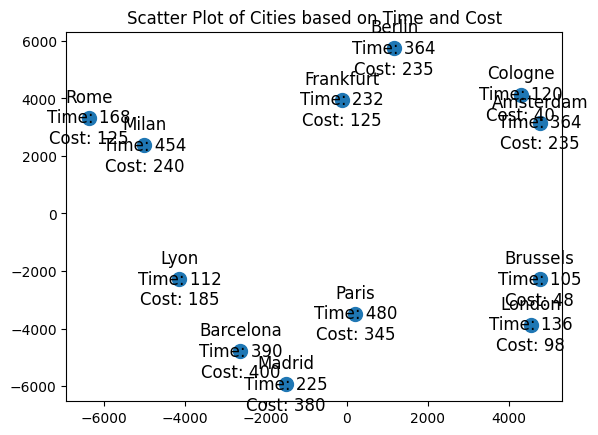

[[    0.   364.   120. 10000.   105. 10000. 10000. 10000. 10000. 10000.
  10000. 10000.]
 [  364.     0. 10000. 10000. 10000.   232. 10000. 10000. 10000. 10000.
  10000. 10000.]
 [  120. 10000.     0. 10000. 10000.   120. 10000. 10000. 10000. 10000.
  10000. 10000.]
 [10000. 10000. 10000.     0.   136. 10000.   136. 10000. 10000. 10000.
  10000. 10000.]
 [  105. 10000. 10000.   136.     0. 10000.    82. 10000. 10000. 10000.
  10000. 10000.]
 [10000.   232.   120. 10000. 10000.     0.   480. 10000.   454. 10000.
  10000. 10000.]
 [10000. 10000. 10000.   136.    82.   480.     0.   112. 10000. 10000.
    390.   225.]
 [10000. 10000. 10000. 10000. 10000. 10000.   112.     0.   176. 10000.
    200. 10000.]
 [10000. 10000. 10000. 10000. 10000.   454. 10000.   176.     0.   168.
  10000. 10000.]
 [10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.   168.     0.
  10000. 10000.]
 [10000. 10000. 10000. 10000. 10000. 10000.   390.   200. 10000. 10000.
      0.   150.]
 [10000. 10000. 10000

In [3]:
from sklearn.manifold import MDS
# Create a distance matrix based on time and cost
cities = list(G.nodes)
distance_matrix = np.zeros((len(cities), len(cities)))
large_number = 10000  # Replace this with a suitable large number

for i, city1 in enumerate(cities):
    for j, city2 in enumerate(cities):
        if city1 == city2:
            distance_matrix[i, j] = 0
        else:
            time = G.get_edge_data(city1, city2, {}).get('time', large_number)
            cost = G.get_edge_data(city1, city2, {}).get('cost', large_number)
            distance_matrix[i, j] = time

# Apply MDS to convert the distance matrix into 2D coordinates
mds = MDS(dissimilarity='precomputed', random_state=42)
coords = mds.fit_transform(distance_matrix)

# Create a dictionary to map city names to 2D coordinates
coords_dict = {city: coord for city, coord in zip(cities, coords)}

# Plot the scatter plot
plt.scatter(coords[:, 0], coords[:, 1], s=100)
for city, coord in coords_dict.items():
    edge_data = G.get_edge_data(city, list(G.neighbors(city))[0])
    time = edge_data['time']
    cost = edge_data['cost']
    plt.text(coord[0], coord[1], f"{city}\nTime: {time}\nCost: {cost}", fontsize=12, ha='center', va='center')
plt.title('Scatter Plot of Cities based on Time and Cost')
plt.show()


print(distance_matrix)


## Applying GA principles using DEAP

### Install DEAP Functions

In [4]:
pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 3.4 MB/s eta 0:00:00


### Import DEAP Functions

In [5]:
from deap import base, creator, tools

###Creating the population of chromosomes

In [6]:
import numpy as np
import copy

np.random.seed(3)

def chromo_create(cities):
    chromo = list(range(len(cities)))
    np.random.shuffle(chromo)
    return chromo



###Function to evaluate the efficiency of the chromo based on distance

In [7]:
def chromo_eval(distance_matrix, chromo):
    dist = 0
    for p in range(len(chromo) - 1):
        i = chromo[p]
        j = chromo[p + 1]
        dist += distance_matrix[i][j]

    # Add distance from last city to first city
    dist += distance_matrix[chromo[-1]][chromo[0]]

    # Return the fitness value as a tuple
    return (dist,)


###Evaluate the fitness of every chromosome in population

In [8]:
tb = base.Toolbox()
creator.create('Fitness_Func', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.Fitness_Func)

###Specify the parameters for the GA

In [9]:
num_population = 200
num_generations = 1000
prob_crossover = .4
prob_mutation = .6

###Generating our population...

In [10]:
tb.register('indexes', chromo_create, cities)
tb.register('individual', tools.initIterate, creator.Individual, tb.indexes)
tb.register('population', tools.initRepeat, list, tb.individual)
tb.register('evaluate', chromo_eval, distance_matrix)
tb.register('select', tools.selTournament)
tb.register('mate', tools.cxPartialyMatched)
tb.register('mutate', tools.mutShuffleIndexes)

In [11]:
population = tb.population(n=num_population)

### We calculate the fitness of our chromosomes

In [12]:
fitness_set = list(tb.map(tb.evaluate, population))
for ind, fit in zip(population, fitness_set):
    ind.fitness.values = fit

###We will sellect the parents for next generation (elitism), offspring is created based on elited parents and the offspring is mutated too.

In [13]:
best_fit_list = []
best_sol_list = []

best_fit = np.Inf

for gen in range(0, num_generations):
    
    if (gen % 50 == 0):
        print(f'Generation: {gen:4} | Fitness: {best_fit:.2f}' )   # print the generation and their fitness level
    
    offspring = tb.select(population, len(population), tournsize=3)
    offspring = list(map(tb.clone, offspring))
    
    for child1, child2 in zip(offspring[0::2], offspring[1::2]):
        if np.random.random() < prob_crossover:
            tb.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for chromo in offspring:
        if np.random.random() < prob_mutation:
            tb.mutate(chromo, indpb=0.01)
            del chromo.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitness_set = map(tb.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitness_set):
        ind.fitness.values = fit
    
    population[:] = offspring
    
    curr_best_sol = tools.selBest(population, 1)[0]
    curr_best_fit = curr_best_sol.fitness.values[0]
    
    if curr_best_fit < best_fit:
        best_sol = curr_best_sol
        best_fit = curr_best_fit

    best_fit_list.append(best_fit)
    best_sol_list.append(best_sol)

Generation:    0 | Fitness: inf
Generation:   50 | Fitness: 21632.00
Generation:  100 | Fitness: 21632.00
Generation:  150 | Fitness: 21632.00
Generation:  200 | Fitness: 21632.00
Generation:  250 | Fitness: 21632.00
Generation:  300 | Fitness: 21632.00
Generation:  350 | Fitness: 21632.00
Generation:  400 | Fitness: 21632.00
Generation:  450 | Fitness: 21632.00
Generation:  500 | Fitness: 21632.00
Generation:  550 | Fitness: 21632.00
Generation:  600 | Fitness: 21632.00
Generation:  650 | Fitness: 21632.00
Generation:  700 | Fitness: 21632.00
Generation:  750 | Fitness: 21632.00
Generation:  800 | Fitness: 21632.00
Generation:  850 | Fitness: 21632.00
Generation:  900 | Fitness: 21632.00
Generation:  950 | Fitness: 21632.00


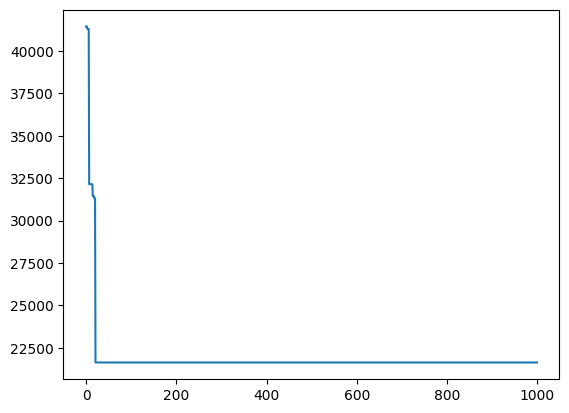

In [14]:
plt.plot(best_fit_list)
plt.show()

## Solution output

In [15]:

index_to_city = {index: city for index, city in enumerate(cities)}


best_solution_cities = [index_to_city[index] for index in best_sol]

best_solution_distance = chromo_eval(distance_matrix, best_sol)[0]

print("Best solution (city indices):", best_sol)
print("Best solution (city names):", best_solution_cities)
print("Distance of the best solution:", best_solution_distance)


Best solution (city indices): [9, 8, 7, 10, 11, 6, 3, 1, 5, 2, 0, 4]
Best solution (city names): ['Rome', 'Milan', 'Lyon', 'Barcelona', 'Madrid', 'Paris', 'London', 'Berlin', 'Frankfurt', 'Cologne', 'Amsterdam', 'Brussels']
Distance of the best solution: 21632.0


<ipython-input-16-b33d80744fa2>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(coords[:, 0],


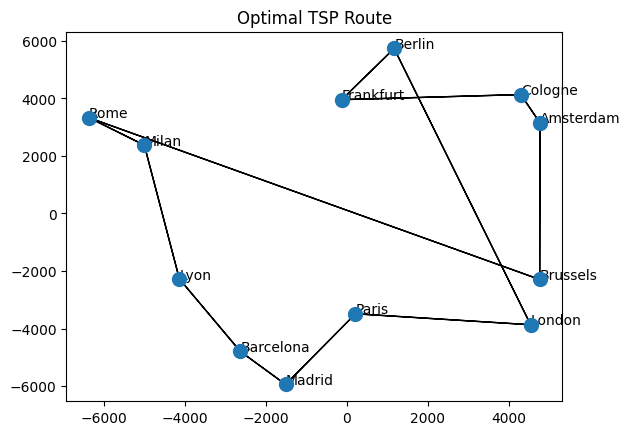

In [16]:
final_sol = [cities[i] for i in best_sol] + [cities[best_sol[0]]]

plt.scatter(coords[:, 0], 
            coords[:, 1], 
            s=100, 
            cmap='viridis',
            zorder=10000)

for i, city in enumerate(cities):
    plt.annotate(city, (coords[i, 0]+1, coords[i, 1]+1))

lines = []
for p in range(len(final_sol) - 1):
    i = cities.index(final_sol[p])
    j = cities.index(final_sol[p+1])
    colour = 'black'       
    plt.arrow(coords[i][0], 
              coords[i][1],
              coords[j][0] - coords[i][0], 
              coords[j][1] - coords[i][1], 
              color=colour)

plt.title('Optimal TSP Route')
plt.show()
